<a href="https://colab.research.google.com/github/Zwarzen/PCVK_Genap_2022/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import cv2 as cv 
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import io
import math
import os
import glob
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


<BarContainer object of 256 artists>

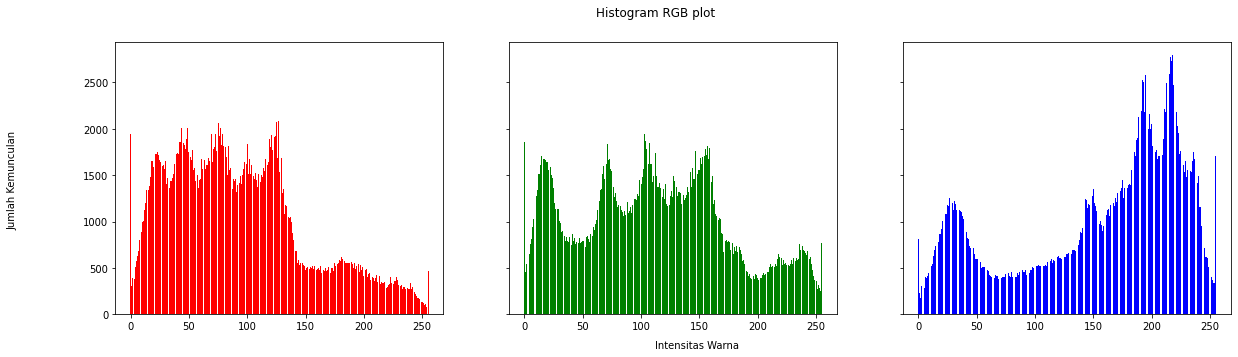

In [10]:
gambar_testlena = cv.imread('/content/drive/MyDrive/Images/lena.jpg')

R = [0]*256
G = [0]*256
B = [0]*256

for y in range(gambar_testlena.shape[0]):
    for x in range(gambar_testlena.shape[1]):
      R[gambar_testlena[y][x][0]] += 1
      G[gambar_testlena[y][x][1]] += 1
      B[gambar_testlena[y][x][2]] += 1

intensitas_warna = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', va='center')
axs[0].bar(intensitas_warna, R, color='Red')
axs[1].bar(intensitas_warna, G, color='Green')
axs[2].bar(intensitas_warna, B, color='Blue')


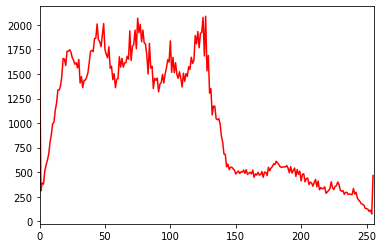

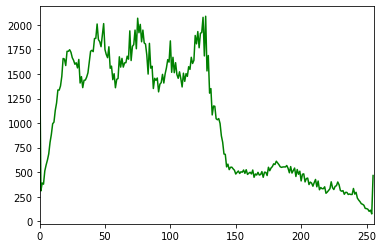

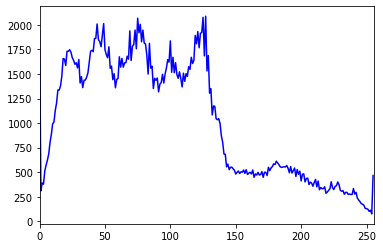

In [11]:
color = ('r')

for i, col in enumerate(color):
  hist2r = cv.calcHist([gambar_testlena], [i], None, [256], [0, 256])
  plt.plot(hist2r, color = col)
  plt.xlim([0, 256])

color = ('g')

plt.show()

for i, col in enumerate(color):
  hist2g = cv.calcHist([gambar_testlena], [i], None, [256], [0, 256])
  plt.plot(hist2g, color = col)
  plt.xlim([0, 256])

plt.show()

color = ('b')

for i, col in enumerate(color):
  hist2b = cv.calcHist([gambar_testlena], [i], None, [256], [0, 256])
  plt.plot(hist2b, color = col)
  plt.xlim([0, 256])

plt.show()

In [5]:
#membuat list dari nilai 0-255
pixels=[]
for x in range(256):
  pixels.append(x)

#lebar dan tinggi gambar
width=gambar_testlena.size
height=gambar_testlena.size
size=width*height
counts=[]

#untuk tiap level intensitas
for i in pixels:

  #setel penghitung ke 0
  temp=0

  #penyebrangan natar the pixels
  for x in range(width):
    for y in range(height):

      #jika intensitas pixel sama dengan level intensitas
      #tambahkan perhitungan
      if (gambar_testlena.getpixel((x,y))==i):
        temp=temp+1
  
  #tambahkan frekuensi dari of level intensitas
  counts.append(temp)

#inisialisasi list untuk Frekuensi kemungkinan
pdf=[]
for i in counts:
  pdf.append(i/size)

#inisialisasi list untuk kemungkinan kumulatif 
cdf=[]
total=0
for i in pdf:
  total=total+i
  cdf.append(total)

#inisialisasi list untuk mapping cdf
tr=[]
for i in cdf:
  t=round(i*255)
  tr.append(t)

#inisialisasi list membawa frekuensi baru untuk histo yang terequalisasi
hs=[]
for i in pixels:
  count=0
  tot=0
  for j in tr:
    if (j==i):
      tot=tot+counts[count]
    count=count+1
  hs.append(tot)

#plot equalized histogram
plt.bar(pixels,hs)
plt.show()

AttributeError: ignored